<a href="https://colab.research.google.com/github/E2-Fund-Quantitative-Research/E2-Fund-Quantitative-Research/blob/main/E%5E2_Quant_Lessons_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

**Credit:**

---

This notebook was made with help of the following sources *(in no particular order)*
* https://github.com/quantopian/research_public/blob/master/notebooks/lectures/Linear_Regression/notebook.ipynb
* https://en.wikipedia.org/wiki/Linear_least_squares
*  https://online.stat.psu.edu/stat462/node/132/


# **Regression**

Content:
* What is Regression
* OLS estimation
* Simple Linear Regression  
* Multiple Linear Regression
* Regression in Matrix form
* OLS optimization solution (general case)

**What is Regression:**

Wikipedia deffinition: "In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable ... and one or more independent variables..."

**Why construct a regression model ?...**

1.   We may want to model the relationship between at least 2 or more variables (you can construct a regression usinf only one variable, this is called autoregression and we will cover it in the future) to infer some causal relationship between the independant and dependant variable
2.   Interpolate, Forcast / Predict (Extrapolate) the relationship between variables

**Regression Model Form**

Regression models prupose that y (the dependant variable) is a function of the the indepedant varibles, x, and its effect on the dependant variables (beta). Therefore we have a model of form

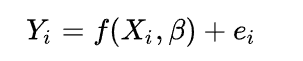

**Ordinary Least Squares (OLS) Estimation**

OLS is a estimation technique for regression equations.

Particularly...

* OLS determines the best fitting straight line through a set of data points.
* OLS aims to minimize the sum of squared distances between the actual data points and the esitmated data points (residuals).
* OLS estimates the unkown parameters B0 and B1 by using the observations in the sample, yi and xi for i = 1,...,n (this is the index of the series, which must be of equal length for y and x).

The intercept and slope estimates are obtained by solving the following minamisation problem (the OLS minamisation problem).

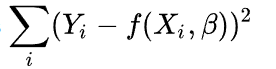

This is reffered to as the objective or loss function, as stated prior by minamising this optimization problem we yeild the OLS estimators of the slope (Bi) and intercept (B0).

For the simple linear regression case (is univarite as it is a function of one variable X) the solution to the optimization probelm will be

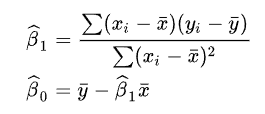

where,
* xhat = the mean of x
* yhat = the mean of y

To see how you can solve the OLS minimisation problem see: [Deriving the least squares estimators of the slope and intercept (simple linear regression)](https://www.youtube.com/watch?v=ewnc1cXJmGA&list=WL&index=2)

**Simple Linear Regression (SLR):**

Regression model of form

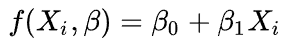

This model is called the "Population Regression" and is often denoted as

image.png

Where,
* variables:
  * X = Independant Variable (we think this variable "causes" variable y
  * Y = This is the dependant variable (The variable we think is "cuased" by X)
* Population / True Parameter
  * B0 = The intercept term
  * B1 = The slope term (this tell us the effect on Y for a unit increase in X)

However as stated prior this is the "population model", meaning it is the regression model if we were to have all available data which is perfectly sampeld with no inacuuarcy (this is impossible). OLS will provide us with an estimate of these "population parameters" This is often reffered to as the fitted values or just parameters.

As a result of OLS we now have the following model

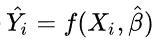



In [ ]:
# lets create a simple linear regression using the OLS optimisation parameter solutions (these are the estiamtes)

class OLS:
  def __init__(self, IndependantVariable, DependantVariable, bias = True):
    self.RegressionType = "SLR"
    self.x = IndependantVariable.values
    self.y = DependantVariable.values
    self.bias = 1 if bias else 0

  def slr(self):

    # get means
    if len(self.x) == len(self.y):
        xbar = np.sum(self.x) / len(self.x)
        ybar = np.sum(self.y) / len(self.y)
    else:
      raise ValueError("Input lists must have the same length.")

    # parameter estiamtes
    n = [(i - xbar)*(j - ybar) for i, j in zip(self.x, self.y)] # zip combines elements with equal index frm the input iterble
    cov = np.sum(n) / len(self.x)
    d = [(k - xbar)**2 for k in self.x]
    var = np.sum(d) / len(self.y)
    b1hat = (1/var)*cov
    b0hat = ybar - b1hat*xbar
    x2 = np.linspace(returns[0].min(), returns[0].max(), 100)
    yhat = b0hat + b1hat*x2 + 0

    return b0hat, b1hat, x2, yhat


get data

In [ ]:
# custom function to get returns for more than one stock
def returns(stocks: list, start_date , end_date):
  returns = []
  for i in range(len(stocks)): # note that indexing is exlusive, omiting the last index => (]
    stock = yf.download(stocks[i], start_date, end_date)
    stock = stock["Close"]
    returns.append(stock.pct_change().dropna())
  return returns

# call function
start_date, end_date = "2020-01-01", "2023-12-31"
TICKERS = ["ZM", "TSLA"]
returns_slr = returns(TICKERS, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Instentiate regression class and get parameters

In [ ]:
# lets estimate our regression
Regression = OLS(returns_slr[0], returns_slr[1])
beta0, beta1, x2, yhat = Regression.slr()
print("β0: %s, \nβ1: %s" %(beta0, beta1))

β0: 0.0027571752258973934, 
β1: 0.39226441004227336


Now that we have our regression parameter estimates we can plot our regression model.

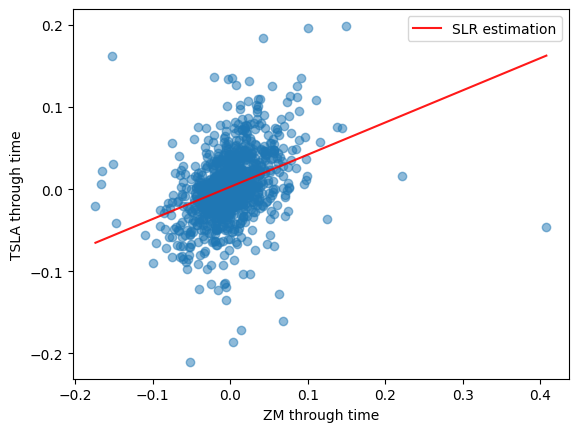

In [ ]:
plt.scatter(returns_slr[0], returns_slr[1], alpha = 0.5)
plt.plot(x2, yhat, label = "SLR estimation", alpha = 0.9, color = "red")
plt.xlabel(f"{TICKERS[0]} through time")
plt.ylabel(f"{TICKERS[1]} through time")
plt.legend();

**Multiple Linear Regression**

We can extend the regression to include more independant variables, hence the name MLR. This may be usefull as...

*   We want more accurate predictions. This can be achieved by including more than one independant varible affecting the dependnat variable we are trying to model. Leaving out these key variables means that their are many confounders in our regression leading to bias estimates (the variation in y attributed to x is bias as x over / under estimates its true effect)

**Multiple Linear Regression Model Example:**

image.png

where,
* i = 1,...,n (the index order)
* p = The number of regressor terms (independant varibles), this is equal to k - 1, were k is the number of beta's (the parameters).

Here the MLR model has i independant variables and i + 1 coefficients.

**Regression Matrix Form:**

Given n MLR models, instead of writing each model out n times we can sammarise this list of models using matrix notation.

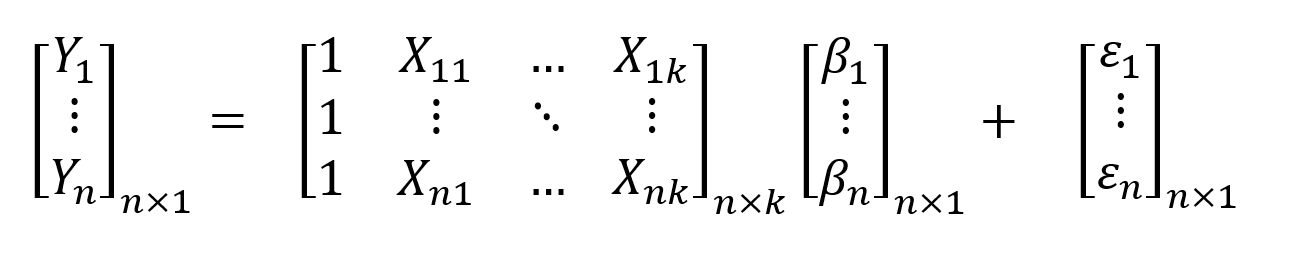

Where,
*  Y(nx1) = dependant variable column vector
*  X(nxK) = Independant variable matrix where n>>k, each row is the n'th regressor value for all k regressors, each column however is all n values of the k'th regressor.
*  B(nx1) = Parameter column vector
*  e(nx1) = Error (unobserved) column vector, assumed to eqial 0.

This can be writen more simply like this...

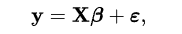

where,
* Y = dependant variable column vector
* X = independant variable matrix (each column in this matrix represents the list of all independant variable values for one single independant variable, their are k independant variables in MLR models)
* B = coefficient column vector
* e = error column vector

Below is an example of this model for the SLR case.

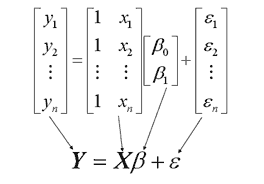

**OLS solution in the general case**

The least squares probelem is defined as

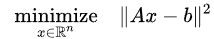


Where,
* A = X (matrix of regressors)
* x = b (vector of beta's)
* b = Y (vector of dependant varible values)

we want to solve for x (the betas), this is a unconstrained optimisation probelm and its closed form solution is the following.

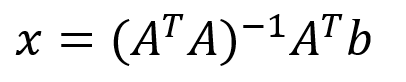

which is equal to

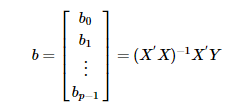





In [ ]:
# lets create a class that calculates the beta parameters of the regression (i.e. solves the OLS problem in the genral case)

# for two variables
class LinearOLS:
  def __init__(self, x, y):
    self.RegressionType = "SLR"
    self.x = x.values
    self.y = y.values

  # The general solution to the least suquares problem
  def ols(self):
    X = np.ones((2, len(self.x)))
    X[1:,] = self.x
    Xt = X.transpose()
    XXt = X @ Xt
    XXtinv = np.linalg.inv(XXt)
    XtY = X @ self.y
    param = XXtinv @ XtY
    b0, b1 = param[0], param[1]

    return b0, b1


In [ ]:
# results will be equal
Regression = LinearOLS(returns_slr[0], returns_slr[1])
b0, b1 = Regression.ols()
print("β0: %s, \nβ1: %s" %(beta0, beta1))

β0: 0.0027571752258973934, 
β1: 0.39226441004227336


**Regression in Python using ```statsmodels```**

Now that we know how regressions are calculated we can use the python packages, these packages will provide us with many extra statistics, packges also offer dynamic methods capable of constructing SLR's and MLR's in different forms (e.g. linear models, log-linear models, log-log models and many more)

In [ ]:
X = returns_slr[0].values
Y = returns_slr[1].values
model = LinearRegression().fit(X.reshape(-1, 1), Y) # we transform X into a two dimensioanl array (column vector)

# get intercept and slope
beta0 = model.intercept_
beta1 = model.coef_
print("β0: %s, \nβ1: %s" %(beta0, beta1))

β0: 0.002757175225897394, 
β1: [0.39226441]


**Regression in Python using ```scikit-learn``` for more detailed results**

For SLR:



In [ ]:
# X will now have a column of 1's, this is beacuse this functions calculates the parametrs using the regression in matrix form
X = sm.add_constant(X)

# creating model
model = sm.OLS(Y, X)
results = model.fit()

# get summary
print(results.summary())

# get some key statsitics
print("R squared: ", results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     147.7
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           8.23e-32
Time:                        14:29:41   Log-Likelihood:                 1808.1
No. Observations:                1005   AIC:                            -3612.
Df Residuals:                    1003   BIC:                            -3602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.001      2.181      0.0

for MLR:

In [ ]:
# lets constuct a MLR model with two coefficients
TICKERS = ["ZM", "TSLA", "NVDA"]
returns_mlr = returns(TICKERS, start_date, end_date)

# our variables
X = list(zip(returns_mlr[1].values, returns_mlr[2].values))
Y = returns_mlr[0].values

# add constants
X = sm.add_constant(X)

# model
model = sm.OLS(Y, X)
res = model.fit()

# get summary
res = res.summary()
print(res)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.4
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.43e-43
Time:                        14:55:01   Log-Likelihood:                 1928.4
No. Observations:                1005   AIC:                            -3851.
Df Residuals:                    1002   BIC:                            -3836.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.557      0.5